<a href="https://colab.research.google.com/github/DanielaPortilloMercado/Inteligencia-Artificial/blob/main/LABORATORIOS/Laboratorio2/PrimerParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1° PARCIAL

REGRESION LINEAL MULTIPLE

Nombre:Daniela Portillo Mercado

Carrera: Ing de Sistemas

link de datatset:
 https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/table/?sort=sensing_date

# DATASET
Análisis del Dataset:
El dataset contiene las siguientes columnas:

ID: Identificador único de la medición.

Location_ID: Identificador del lugar donde se realizaron los conteos.

Sensing_Date: Fecha y hora de la medición.

HourDay: Hora del día en que se registraron los peatones.

Direction_1: Número de peatones en una dirección.

Direction_2: Número de peatones en la otra dirección.

Total_of_Directions: Total de peatones en ambas direcciones.

Sensor_Name: Nombre del sensor que hizo la medición.

Location: Coordenadas geográficas del lugar de la medición.

In [ ]:
# Librerías necesarias
import os
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Carga y visualización del dataset

In [ ]:
# Cargar el dataset en formato CSV desde Google Drive
path = '/content/gdrive/MyDrive/pedestriancounting.csv'
data = pd.read_csv(path)

# Vista preliminar
data.head()


,ID,Location_ID,Sensing_Date,HourDay,Direction_1,Direction_2,Total_of_Directions,Sensor_Name,Location
0,171820240125,17,2024-01-25,18,185,299,484,Col15_T,"-37.81362543, 144.97323591"
1,121320231230,12,2023-12-30,13,138,204,342,NewQ_T,"-37.81457988, 144.94292398"
2,392320250308,39,2025-03-08,23,30,35,65,AlfPl_T,"-37.81379749, 144.96995745"
3,362220230122,36,2023-01-22,22,61,40,101,Que85_T,"-37.81652527, 144.96121062"
4,371920220424,37,2022-04-24,19,293,394,687,Lyg260_T,"-37.80107122, 144.96704554"


# Preprocesamiento del dataset
En esta sección se realiza:

Eliminación de datos nulos

Selección de características importantes

Codificación de fechas

Conversión de valores categóricos si los hay

In [ ]:
# Convertir 'Sensing_Date' a datetime
data['Sensing_Date'] = pd.to_datetime(data['Sensing_Date'])

# Extraer la hora del día
data['HourDay'] = data['Sensing_Date'].dt.hour


# Selección de Características y Objetivo:*

Seleccionamos las columnas relevantes para las variables independientes y dependientes.

In [ ]:
# Seleccionamos las columnas relevantes
# Para este ejemplo, usaremos HourDay, Direction_1 y Direction_2 como características
# y Total_of_Directions como el objetivo

X = data[['HourDay', 'Direction_1', 'Direction_2']].values
y = data['Total_of_Directions'].values

m = y.size  # número de ejemplos de entrenamiento
print("Número de ejemplos:", m)

Número de ejemplos: 2271487


# Normalización de Características:

Estandarizamos las características para mejorar el rendimiento del modelo.

In [ ]:
# Función para normalizar características (corregida)
def featureNormalizeByRange(X):
    X_norm = X.copy()
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)

    # Evitar división por cero en el rango
    range_vals = max_vals - min_vals
    range_vals = np.where(range_vals == 0, 1, range_vals)  # Si el rango es cero, reemplazarlo por 1

    X_norm = (X - min_vals) / range_vals
    return X_norm, min_vals, range_vals


In [ ]:
# Normalizamos las características (corrigiendo la duplicación)
X_norm, mu, sigma = featureNormalizeByRange(X)

# Añadimos el término de intersección (columna de unos)
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

# Inicializamos los parámetros de theta
theta = np.zeros(X_norm.shape[1])


# Descenso por el gradiente
En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz  X . La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones computeCostMulti y gradientDescentMulti son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar shape, propiedad de los arrays numpy, para identificar cuantas caracteristicas estan consideradas en el dataset.

**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

In [ ]:
# Función de costo para regresión lineal múltiple
def computeCostMulti(X, y, theta):
    m = y.shape[0]  # número de ejemplos
    J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # número de ejemplos
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        # Corregimos la fórmula del gradiente
        theta = theta - (alpha / m) * (np.dot(X.T, (np.dot(X, theta) - y)))
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

# Seleccionando coheficientes de aprendizaje

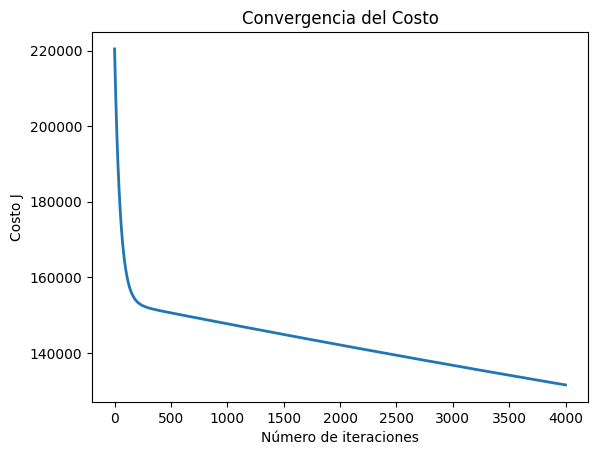

Theta calculado por el descenso por el gradiente: [341.69490615   0.         680.77518688 660.27871543]
El conteo predicho para HourDay=10, Direction_1=50, Direction_2=30: 348
El conteo predicho para HourDay=15, Direction_1=100, Direction_2=80: 355


In [ ]:
# Elegimos el valor de alpha (tasa de aprendizaje) y el número de iteraciones
alpha = 0.01  # Puedes experimentar con otros valores
num_iters = 4000

# Ejecutamos el descenso por el gradiente
theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)

# Graficamos la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del Costo')
plt.show()

# Mostramos los resultados obtenidos con el descenso por el gradiente
print(f'Theta calculado por el descenso por el gradiente: {theta}')

# Hacemos una predicción usando el modelo entrenado
# Supongamos que queremos predecir el conteo total para una hora específica, dirección 1 y dirección 2.
# Por ejemplo, para HourDay = 10, Direction_1 = 50, Direction_2 = 30:
X_array = np.array([1, (10 - mu[0]) / sigma[0], (50 - mu[1]) / sigma[1], (30 - mu[2]) / sigma[2]])
predicted_count = np.dot(X_array, theta)

print(f'El conteo predicho para HourDay=10, Direction_1=50, Direction_2=30: {predicted_count:.0f}')

# También puedes calcular el precio estimado para otros valores de HourDay, Direction_1 y Direction_2.
X_array = np.array([1, (15 - mu[0]) / sigma[0], (100 - mu[1]) / sigma[1], (80 - mu[2]) / sigma[2]])
predicted_count_2 = np.dot(X_array, theta)

print(f'El conteo predicho para HourDay=15, Direction_1=100, Direction_2=80: {predicted_count_2:.0f}')